In [6]:
import numpy as np
import matplotlib.pyplot as plt
from ler.rates import LeR
from ler.utils import get_param_from_json

In [7]:
import ler
import gwsnr
print(f"ler version: {ler.__version__}")
print(f"gwsnr version: {gwsnr.__version__}")

ler version: 0.3.7
gwsnr version: 0.2.4


In [9]:
ler = LeR(npool=4,
          verbose=False, 
          event_type='BNS', 
          mtot_max=51, 
          z_max=5,
          psds={'L1':'custom_psd.txt'},
          snr_type="interpolation",
          )

## Un-lensed events

In [17]:
# snr_cut=8.0
ler.selecting_n_unlensed_detectable_events(size=500, batch_size=100000,snr_threshold=8.0, output_jsonfile='n_unlensed_detectable_bns.json', meta_data_file='n_unlensed_detectable_bns_meta.json', resume=True);

collected number of detectable events =  300
collected number of detectable events =  300
total number of events =  72500000
total unlensed rate (yr^-1): 0.38732583499078327
collected number of detectable events =  301
total number of events =  72600000
total unlensed rate (yr^-1): 0.3880816360921197
collected number of detectable events =  302
total number of events =  72700000
total unlensed rate (yr^-1): 0.3888353579607152
collected number of detectable events =  303
total number of events =  72800000
total unlensed rate (yr^-1): 0.3895870091648366
collected number of detectable events =  305
total number of events =  72900000
total unlensed rate (yr^-1): 0.3916206001935846
collected number of detectable events =  305
total number of events =  73000000
total unlensed rate (yr^-1): 0.3910841336179769
collected number of detectable events =  305
total number of events =  73100000
total unlensed rate (yr^-1): 0.39054913480317804
collected number of detectable events =  307
total number

In [18]:
# let's see how rate varies with sampling size
meta_data = get_param_from_json('ler_data/n_unlensed_detectable_bns_meta.json')
meta_data.keys()

dict_keys(['events_total', 'detectable_events', 'total_rate'])

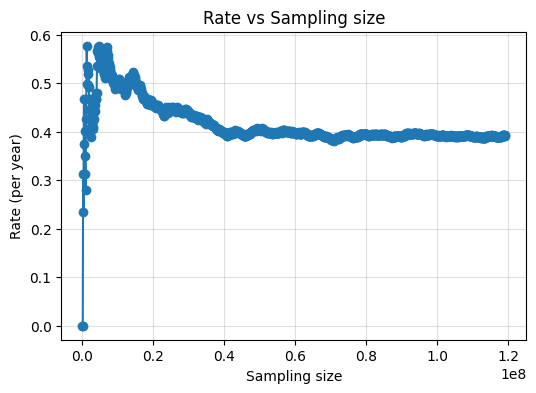

In [19]:
# plot the rate vs sampling size
plt.figure(figsize=(6,4))
plt.plot(meta_data['events_total'], meta_data['total_rate'], 'o-')
plt.xlabel('Sampling size')
plt.ylabel('Rate (per year)')
plt.title('Rate vs Sampling size')
plt.grid(alpha=0.4)
plt.show()

In [20]:
# select only events after sampling size of 
idx = np.where(meta_data['events_total'] > 0.6e8)[0]
# take average 
rate_unlensed = np.mean(meta_data['total_rate'][idx])
print('Rate (per year) =', rate_unlensed)

Rate (per year) = 0.3922295568621635


## Lensed events

In [13]:
# snr_cut=8.0
# time will take long time sample
ler.selecting_n_lensed_detectable_events(size=500, batch_size=100000,snr_threshold=8.0, num_img=1, output_jsonfile='n_lensed_detectable_bns.json', meta_data_file='n_lensed_detectable_bns_meta.json', resume=True);

collected number of detectable events =  480.0


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.52it/s]


collected number of events =  481.0
total number of events =  130900000
total lensed rate (yr^-1): 0.0007121850630357703


100%|█████████████████████████████████████████████████████| 100000/100000 [00:25<00:00, 3903.18it/s]


collected number of events =  481.0
total number of events =  131000000
total lensed rate (yr^-1): 0.0007116414103158958


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.34s/it]


collected number of events =  481.0
total number of events =  131100000
total lensed rate (yr^-1): 0.000711098586967066


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.63s/it]


collected number of events =  481.0
total number of events =  131200000
total lensed rate (yr^-1): 0.0007105565910928533


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.52s/it]


collected number of events =  481.0
total number of events =  131300000
total lensed rate (yr^-1): 0.0007100154208026073


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.46it/s]


collected number of events =  482.0
total number of events =  131400000
total lensed rate (yr^-1): 0.0007109500743657191


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.33s/it]


collected number of events =  482.0
total number of events =  131500000
total lensed rate (yr^-1): 0.0007104094279213345


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.07it/s]


collected number of events =  482.0
total number of events =  131600000
total lensed rate (yr^-1): 0.0007098696031280812


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  3.00s/it]


collected number of events =  482.0
total number of events =  131700000
total lensed rate (yr^-1): 0.0007093305981143165


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.36s/it]


collected number of events =  482.0
total number of events =  131800000
total lensed rate (yr^-1): 0.0007087924110140781


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.55s/it]


collected number of events =  482.0
total number of events =  131900000
total lensed rate (yr^-1): 0.0007082550399670621


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.31it/s]


collected number of events =  482.0
total number of events =  132000000
total lensed rate (yr^-1): 0.0007077184831186022


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.54s/it]


collected number of events =  482.0
total number of events =  132100000
total lensed rate (yr^-1): 0.000707182738619648


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.55s/it]


collected number of events =  483.0
total number of events =  132200000
total lensed rate (yr^-1): 0.0007081138789102015


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.07it/s]


collected number of events =  484.0
total number of events =  132300000
total lensed rate (yr^-1): 0.0007090436115812681


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.68s/it]


collected number of events =  484.0
total number of events =  132400000
total lensed rate (yr^-1): 0.0007085080801525813


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.02it/s]


collected number of events =  484.0
total number of events =  132500000
total lensed rate (yr^-1): 0.0007079733570732209


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:03<00:00,  1.68it/s]


collected number of events =  484.0
total number of events =  132600000
total lensed rate (yr^-1): 0.0007074394405143422


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.61it/s]


collected number of events =  484.0
total number of events =  132700000
total lensed rate (yr^-1): 0.0007069063286526132


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.33s/it]


collected number of events =  484.0
total number of events =  132800000
total lensed rate (yr^-1): 0.000706374019670194


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.37s/it]


collected number of events =  487.0
total number of events =  132900000
total lensed rate (yr^-1): 0.0007102175686457578


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.32s/it]


collected number of events =  488.0
total number of events =  133000000
total lensed rate (yr^-1): 0.0007111408262653711


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.54s/it]


collected number of events =  488.0
total number of events =  133100000
total lensed rate (yr^-1): 0.0007106065356370725


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.03s/it]


collected number of events =  488.0
total number of events =  133200000
total lensed rate (yr^-1): 0.0007100730472469546


100%|█████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.21it/s]


collected number of events =  488.0
total number of events =  133300000
total lensed rate (yr^-1): 0.00070954035928953


100%|█████████████████████████████████████████████████████| 100000/100000 [00:30<00:00, 3321.15it/s]


collected number of events =  490.0
total number of events =  133400000
total lensed rate (yr^-1): 0.0007119142423826136


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.64s/it]


collected number of events =  490.0
total number of events =  133500000
total lensed rate (yr^-1): 0.0007113809732871959


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.61s/it]


collected number of events =  491.0
total number of events =  133600000
total lensed rate (yr^-1): 0.0007122992137283965


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.60s/it]


collected number of events =  491.0
total number of events =  133700000
total lensed rate (yr^-1): 0.0007117664544062362


100%|█████████████████████████████████████████████████████| 100000/100000 [00:29<00:00, 3438.43it/s]


collected number of events =  491.0
total number of events =  133800000
total lensed rate (yr^-1): 0.0007112344914358279


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.43it/s]


collected number of events =  491.0
total number of events =  133900000
total lensed rate (yr^-1): 0.0007107033230329633


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.53s/it]


collected number of events =  491.0
total number of events =  134000000
total lensed rate (yr^-1): 0.0007101729474187596


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.52s/it]


collected number of events =  491.0
total number of events =  134100000
total lensed rate (yr^-1): 0.0007096433628196405


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.30s/it]


collected number of events =  491.0
total number of events =  134200000
total lensed rate (yr^-1): 0.0007091145674673158


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.51s/it]


collected number of events =  492.0
total number of events =  134300000
total lensed rate (yr^-1): 0.0007100297094146458


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.37s/it]


collected number of events =  492.0
total number of events =  134400000
total lensed rate (yr^-1): 0.0007095014134999028


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.30s/it]


collected number of events =  492.0
total number of events =  134500000
total lensed rate (yr^-1): 0.0007089739031552932


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.31s/it]


collected number of events =  493.0
total number of events =  134600000
total lensed rate (yr^-1): 0.000709887109915751


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.31s/it]


collected number of events =  495.0
total number of events =  134700000
total lensed rate (yr^-1): 0.0007122378250572114


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.53s/it]


collected number of events =  496.0
total number of events =  134800000
total lensed rate (yr^-1): 0.0007131472556044475


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.09it/s]


collected number of events =  496.0
total number of events =  134900000
total lensed rate (yr^-1): 0.0007126186067863567


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.35s/it]


collected number of events =  496.0
total number of events =  135000000
total lensed rate (yr^-1): 0.0007120907411517001


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.08it/s]


collected number of events =  496.0
total number of events =  135100000
total lensed rate (yr^-1): 0.0007115636569613584


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.40s/it]


collected number of events =  496.0
total number of events =  135200000
total lensed rate (yr^-1): 0.0007110373524813573


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.32s/it]


collected number of events =  496.0
total number of events =  135300000
total lensed rate (yr^-1): 0.0007105118259828493


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.34s/it]


collected number of events =  496.0
total number of events =  135400000
total lensed rate (yr^-1): 0.0007099870757420938


100%|█████████████████████████████████████████████████████| 100000/100000 [00:24<00:00, 4076.90it/s]


collected number of events =  496.0
total number of events =  135500000
total lensed rate (yr^-1): 0.0007094631000404392


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.31s/it]


collected number of events =  497.0
total number of events =  135600000
total lensed rate (yr^-1): 0.0007103692114731022


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.58s/it]


collected number of events =  497.0
total number of events =  135700000
total lensed rate (yr^-1): 0.0007098457264241169


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.33s/it]


collected number of events =  497.0
total number of events =  135800000
total lensed rate (yr^-1): 0.0007093230123398576


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.53s/it]


collected number of events =  497.0
total number of events =  135900000
total lensed rate (yr^-1): 0.0007088010675184155


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.02it/s]


collected number of events =  497.0
total number of events =  136000000
total lensed rate (yr^-1): 0.0007082798902628872


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.44it/s]


collected number of events =  497.0
total number of events =  136100000
total lensed rate (yr^-1): 0.0007077594788813568


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.11it/s]


collected number of events =  497.0
total number of events =  136200000
total lensed rate (yr^-1): 0.000707239831686877


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.36s/it]


collected number of events =  497.0
total number of events =  136300000
total lensed rate (yr^-1): 0.0007067209469974517


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.09it/s]


collected number of events =  497.0
total number of events =  136400000
total lensed rate (yr^-1): 0.0007062028231360166


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.45s/it]


collected number of events =  497.0
total number of events =  136500000
total lensed rate (yr^-1): 0.0007056854584304224


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.31s/it]


collected number of events =  497.0
total number of events =  136600000
total lensed rate (yr^-1): 0.0007051688512134162


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.36s/it]


collected number of events =  497.0
total number of events =  136700000
total lensed rate (yr^-1): 0.0007046529998226237


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.11it/s]


collected number of events =  497.0
total number of events =  136800000
total lensed rate (yr^-1): 0.0007041379026005312


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.10it/s]


collected number of events =  497.0
total number of events =  136900000
total lensed rate (yr^-1): 0.0007036235578944679


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.29it/s]


collected number of events =  497.0
total number of events =  137000000
total lensed rate (yr^-1): 0.0007031099640565887


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.55s/it]


collected number of events =  498.0
total number of events =  137100000
total lensed rate (yr^-1): 0.0007040107957405236


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.32s/it]


collected number of events =  498.0
total number of events =  137200000
total lensed rate (yr^-1): 0.0007034976683383804


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.11it/s]


collected number of events =  498.0
total number of events =  137300000
total lensed rate (yr^-1): 0.0007029852883905738


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.42it/s]


collected number of events =  498.0
total number of events =  137400000
total lensed rate (yr^-1): 0.0007024736542651077


100%|█████████████████████████████████████████████████████| 100000/100000 [00:24<00:00, 4065.47it/s]


collected number of events =  498.0
total number of events =  137500000
total lensed rate (yr^-1): 0.0007019627643347331


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.46it/s]


collected number of events =  499.0
total number of events =  137600000
total lensed rate (yr^-1): 0.0007028611563684517


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.74s/it]


collected number of events =  499.0
total number of events =  137700000
total lensed rate (yr^-1): 0.0007023507270609945


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.31s/it]


collected number of events =  499.0
total number of events =  137800000
total lensed rate (yr^-1): 0.0007018410385798182


100%|█████████████████████████████████████████████████████████████████| 8/8 [00:02<00:00,  2.89it/s]


collected number of events =  499.0
total number of events =  137900000
total lensed rate (yr^-1): 0.0007013320893132628


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.58s/it]


collected number of events =  500.0
total number of events =  138000000
total lensed rate (yr^-1): 0.0007022283343229861
storing detectable lensed params in ./ler_data/n_lensed_detectable_bns.json

 trmming final result to size=500


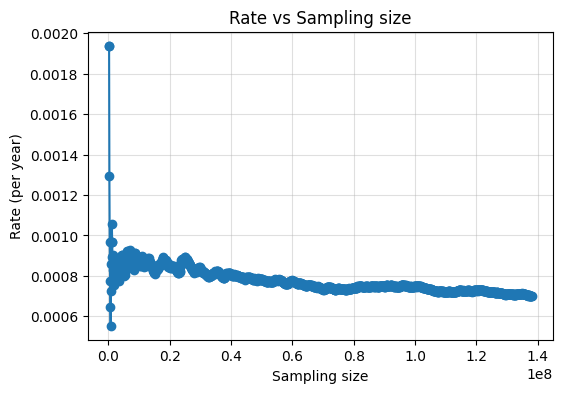

In [14]:
# let's see how rate varies with sampling size
meta_data = get_param_from_json('ler_data/n_lensed_detectable_bns_meta.json')
# plot the rate vs sampling size
plt.figure(figsize=(6,4))
plt.plot(meta_data['events_total'], meta_data['total_rate'], 'o-')
plt.xlabel('Sampling size')
plt.ylabel('Rate (per year)')
plt.title('Rate vs Sampling size')
plt.grid(alpha=0.4)
plt.show()

In [15]:
# select only events after sampling size of 
idx = np.where(meta_data['events_total'] > 0.8e8)[0]
# take average 
rate_lensed = np.mean(meta_data['total_rate'][idx])
print('Rate (per year) =', rate_lensed)

Rate (per year) = 0.000731523907162698


## rate comparison

In [21]:
rate_unlensed/rate_lensed

536.1814604029446